Arquivo CSV de arestas (edges.csv) criado com sucesso!
Arquivo CSV de nós (nodes.csv) com Label (rótulo) criado com sucesso!


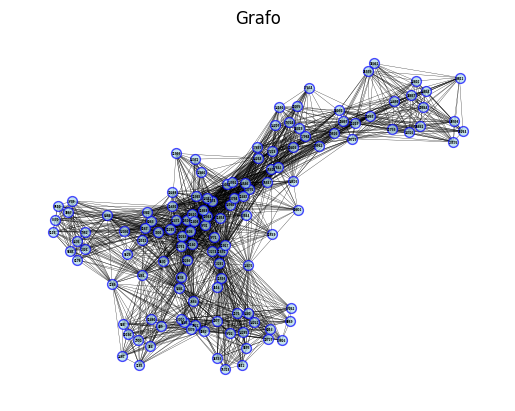

In [43]:
import pandas as pd
import networkx as nx
import csv
import numpy as np
import matplotlib.pyplot as plt

# Carregue os dados dos usuários e suas classificações
ratings_df = pd.read_csv('DdosReduzidos300.csv', delimiter=';')

# Crie um dicionário que mapeia IDs de usuário às suas avaliações como um DataFrame
user_ratings_dict = {}
for user_id, group in ratings_df.groupby('user_id'):
    user_ratings_dict[user_id] = group

G = nx.Graph()  # Crie um grafo não direcionado

# Adicione nós para os usuários
user_ids = ratings_df['user_id'].unique()
G.add_nodes_from(user_ids)

# Crie conexões com base nas classificações dos livros
for i, user_id in enumerate(user_ids):
    user_ratings = user_ratings_dict[user_id]
    
    for other_user_id in user_ids[i+1:]:
        other_user_ratings = user_ratings_dict[other_user_id]
        
        common_books = set(user_ratings['book_id']).intersection(set(other_user_ratings['book_id']))
        
        if common_books:
            # Obtenha as classificações de livros em comum como arrays NumPy
            user_ratings_common = user_ratings[user_ratings['book_id'].isin(common_books)]['rating'].values
            other_user_ratings_common = other_user_ratings[other_user_ratings['book_id'].isin(common_books)]['rating'].values
            
            # Preencher com zeros para igualar o tamanho
            max_len = max(len(user_ratings_common), len(other_user_ratings_common))
            user_ratings_common = np.pad(user_ratings_common, (0, max_len - len(user_ratings_common)))
            other_user_ratings_common = np.pad(other_user_ratings_common, (0, max_len - len(other_user_ratings_common)))
            
            # Calcular a distância euclidiana usando operações vetorizadas
            euclidean_distance = np.linalg.norm(user_ratings_common - other_user_ratings_common)
            
            # Adicione a aresta com o peso (distância euclidiana) como atributo
            G.add_edge(user_id, other_user_id, books_in_common=list(common_books), weight=euclidean_distance)

# O restante do código permanece o mesmo
# Abra o arquivo CSV para escrita de arestas
with open('edges.csv', mode='w', newline='') as edge_file:
    edge_writer = csv.writer(edge_file)

    # Escreva o cabeçalho do CSV
    edge_writer.writerow(['Source', 'Target', 'Weight'])

    # Itere sobre as arestas e escreva as informações no arquivo CSV
    for u, v, edata in G.edges(data=True):
        edge_writer.writerow([u, v, edata['weight']])


print("Arquivo CSV de arestas (edges.csv) criado com sucesso!")

# Crie um arquivo CSV para os nós com ID e Label (rótulo)
with open('nodes.csv', mode='w', newline='') as node_file:
    node_writer = csv.writer(node_file)

    # Escreva o cabeçalho do CSV com as colunas "ID" e "Label"
    node_writer.writerow(['ID', 'Label'])

    # Itere sobre os nós e escreva as informações no arquivo CSV
    for node in G.nodes():
        # O ID é usado como o Label neste exemplo
        node_writer.writerow([node, node])

print("Arquivo CSV de nós (nodes.csv) com Label (rótulo) criado com sucesso!")

# # Layout personalizado (você pode ajustar os valores de k e iterations)
# pos = nx.circular_layout(G)

# # Redefina o tamanho dos nós para torná-los mais visíveis
# node_size = 400

# # Ajuste a espessura das arestas com base nos pesos
# edge_width = [edata['weight'] for u, v, edata in G.edges(data=True)]

# # Ajuste o tamanho da fonte para os rótulos dos nós
# font_size = 10

# labels = {node: node for node in G.nodes()}

# # Desenhe o grafo
# nx.draw(G, pos, labels=labels, with_labels=True, node_size=node_size, font_size=font_size, width=edge_width, edge_cmap=plt.cm.Blues)

# # Mostre o gráfico
# plt.show()

import matplotlib.pyplot as plt

# Crie uma visualização do grafo
pos = nx.spring_layout(G, k=0.5)  # Define o layout do grafo (ajustamos o parâmetro 'k' para aumentar o espaçamento)

# Desenhe os nós com bordas e ajuste o tamanho dos nós
nx.draw_networkx_nodes(G, pos, node_size=50, node_color='lightblue', edgecolors='blue', linewidths=1, alpha=0.7)

# Desenhe as arestas com espessura
nx.draw_networkx_edges(G, pos, width=0.2)

# Adicione rótulos aos nós
nx.draw_networkx_labels(G, pos, font_size=2, font_color='black', font_weight='bold')

# Exiba a visualização
plt.title("Grafo")
plt.axis('off')  # Remova os eixos para uma melhor visualização
plt.show()



Antes de removido 
 book_id    0
user_id    0
rating     0
dtype: int64
Depois de removido 
 book_id    0
user_id    0
rating     0
dtype: int64
Usuarios selecionados:  Index([11691, 13794, 10140, 11927, 11692, 11285, 13776, 12946, 12874, 11408,
       10610, 10944, 13282,  9246, 11945, 10509, 13034, 13991,  6630,  7001,
       12381,  9731, 11868, 10246, 19526, 13274, 11599, 14546, 10249, 15604,
       17228, 17643,  2077, 17663,  8167,  7563,  5461, 12476,  5379,  6063,
        3662,  6342],
      dtype='int64', name='user_id')
Dataset antes:  (300, 3)
Dataset depois:  (187, 3)


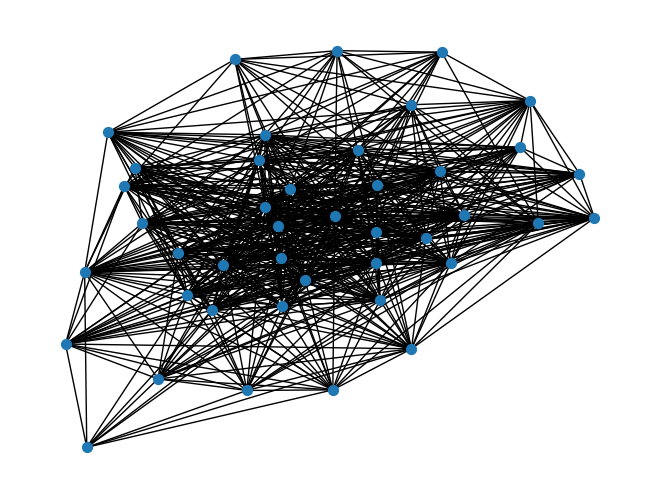

In [18]:
import pandas as pd
import numpy as np

books = pd.read_csv('DdosReduzidos300.csv', low_memory=False, delimiter=';') #o low memory é pq o arquivo é muito grande e ai o panda n precisa identificar cada variavel, se ele nao identificar ele colcoa como string, Deixa mais rapido
books.head(3)

#Selecionando as variaveis que vao ser utlizadas
books = books[['book_id', 'user_id', 'rating' ]]

print("Antes de removido \n", books.isna().sum()) 

#removendo se tivesse valores nulos
books.dropna(inplace=True)

print("Depois de removido \n", books.isna().sum()) 

#verificando a quantidade de avaliações por usuários
books['user_id'].value_counts()

#pegando os usuarios que fizeram mais de 3 avaliações
qt_rating = books['user_id'].value_counts() >= 3
y = qt_rating[qt_rating].index
y.shape

print("Usuarios selecionados: ", y)

#visualizando o tamanho do dataset
print("Dataset antes: ", books.shape)

#Pegando somente dos usuraios que avaliaram mais de 3 vezes mas agora no dataframe
books = books[books['user_id'].isin(y)]

print("Dataset depois: ", books.shape)
# # Cada usuario é um nó e esta ligado a um livro e o peso da aresta é a nota que deu para o livro
# import networkx as nx

# # Crie um grafo direcionado
# G = nx.DiGraph()

# # Adicione nós para os usuários
# G.add_nodes_from(y)

# # Adicione arestas com peso para cada avaliação
# for index, row in books.iterrows():
#     G.add_edge(row['user_id'], row['book_id'], weight=row['rating'])

# # Agora você tem um grafo onde os nós são usuários e os livros são conectados a eles com base em suas avaliações.

# # Você pode usar algoritmos de recomendação, como PageRank, para encontrar livros recomendados para cada usuário com base na estrutura do grafo.

# # Exemplo de recomendação para um usuário (substitua 'user_id' pelo usuário desejado):
# user_id = 2077
# recommendations = nx.pagerank(G, weight='weight', personalization={user_id: 1})

# # Ordene as recomendações por pontuação
# sorted_recommendations = sorted(recommendations.items(), key=lambda x: x[1], reverse=True)

# # Recomende os livros mais bem classificados para o usuário
# print(f"Recomendações para o usuário {user_id}:")
# for book, score in sorted_recommendations:
#     print(f"Livro: {book}, Pontuação: {score}")


# import networkx as nx


# import networkx as nx

# # Crie um grafo não direcionado
# G = nx.Graph()

# # Adicione nós para os usuários
# G.add_nodes_from(y)

# # Adicione arestas com base nos livros lidos em comum
# for user1 in y:
#     for user2 in y:
#         if user1 != user2:
#             books_user1 = set(books[books['user_id'] == user1]['book_id'])
#             books_user2 = set(books[books['user_id'] == user2]['book_id'])
#             common_books = books_user1.intersection(books_user2)
#             if common_books:
#                 weight = len(common_books)
#                 G.add_edge(user1, user2, weight=weight)

# # Agora você tem um grafo onde os nós são usuários e as arestas representam a relação com base nos livros lidos em comum.

# # Você pode usar algoritmos de recomendação, como filtragem colaborativa, para recomendar livros com base nesse grafo.




# # import matplotlib.pyplot as plt

# # # Crie um grafo direcionado
# # G = nx.DiGraph()

# # # Adicione nós para os usuários
# # G.add_nodes_from(y)

# # # Adicione arestas com peso para cada avaliação
# # for index, row in books.iterrows():
# #     G.add_edge(row['user_id'], row['book_id'], weight=row['rating'])

# # # Exemplo de layout para visualização
# # pos = nx.spring_layout(G)

# # # Desenhe os nós com rótulos
# # nx.draw_networkx_nodes(G, pos, node_size=50)
# # nx.draw_networkx_labels(G, pos, font_size=3, font_family='sans-serif')

# # # Desenhe as arestas com base nos pesos
# # edge_labels = {(u, v): d['weight'] for u, v, d in G.edges(data=True)}
# # nx.draw_networkx_edges(G, pos, width=[d['weight'] for u, v, d in G.edges(data=True)])
# # nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

# # # Mostre o gráfico
# # plt.axis('off')
# # plt.show()






# import networkx as nx
# import matplotlib.pyplot as plt

# # Crie um grafo não direcionado
# G = nx.Graph()

# # Adicione nós para os usuários
# G.add_nodes_from(y)

# # Adicione arestas com base nos livros lidos em comum
# for user1 in y:
#     for user2 in y:
#         if user1 != user2:
#             books_user1 = set(books[books['user_id'] == user1]['book_id'])
#             books_user2 = set(books[books['user_id'] == user2]['book_id'])
#             common_books = books_user1.intersection(books_user2)
#             if common_books:
#                 weight = len(common_books)
#                 G.add_edge(user1, user2, weight=weight)

# # Exemplo de layout para visualização
# pos = nx.spring_layout(G)

# # Desenhe os nós
# nx.draw(G, pos, node_size=50)

# # Mostre o gráfico
# plt.axis('off')
# plt.show()



import networkx as nx
import matplotlib.pyplot as plt

# Função para criar o grafo com base nos usuários e livros em comum
def create_user_graph(users, books):
    G = nx.Graph()
    G.add_nodes_from(users)
    
    for user1 in users:
        for user2 in users:
            if user1 != user2:
                books_user1 = set(books[books['user_id'] == user1]['book_id'])
                books_user2 = set(books[books['user_id'] == user2]['book_id'])
                common_books = books_user1.intersection(books_user2)
                if common_books:
                    weight = len(common_books)
                    G.add_edge(user1, user2, weight=weight)
    
    return G

# Crie o grafo
G = create_user_graph(y, books)

# Exemplo de layout para visualização
pos = nx.spring_layout(G)

# Desenhe os nós
nx.draw(G, pos, node_size=50)

# Mostre o gráfico
plt.axis('off')
plt.show()


Antes de removido 
 book_id    0
user_id    0
rating     0
dtype: int64
Depois de removido 
 book_id    0
user_id    0
rating     0
dtype: int64
Usuarios selecionados:  Index([11691, 13794, 10140, 11927, 11692, 11285, 13776, 12946, 12874, 11408,
       10610, 10944, 13282,  9246, 11945, 10509, 13034],
      dtype='int64', name='user_id')
Dataset antes:  (300, 3)
Dataset depois:  (105, 3)


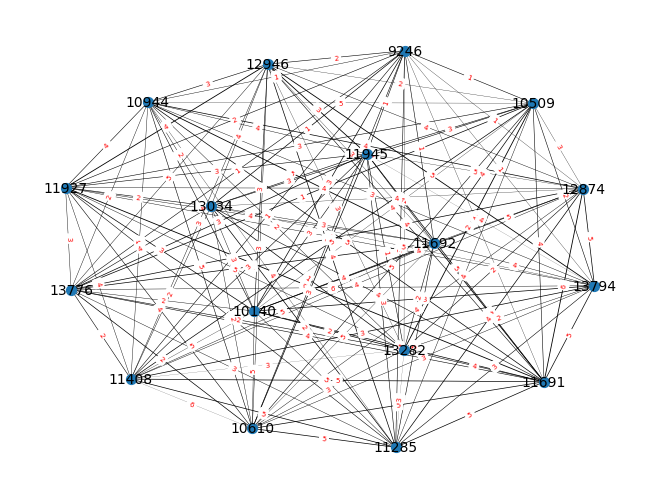

In [51]:
import pandas as pd
import numpy as np

books = pd.read_csv('DdosReduzidos300.csv', low_memory=False, delimiter=';') #o low memory é pq o arquivo é muito grande e ai o panda n precisa identificar cada variavel, se ele nao identificar ele colcoa como string, Deixa mais rapido
books.head(3)

#Selecionando as variaveis que vao ser utlizadas
books = books[['book_id', 'user_id', 'rating' ]]

print("Antes de removido \n", books.isna().sum()) 

#removendo se tivesse valores nulos
books.dropna(inplace=True)

print("Depois de removido \n", books.isna().sum()) 

#verificando a quantidade de avaliações por usuários
books['user_id'].value_counts()

#pegando os usuarios que fizeram mais de 3 avaliações
qt_rating = books['user_id'].value_counts() >= 5
y = qt_rating[qt_rating].index
y.shape

print("Usuarios selecionados: ", y)

#visualizando o tamanho do dataset
print("Dataset antes: ", books.shape)

#Pegando somente dos usuraios que avaliaram mais de 3 vezes mas agora no dataframe
books = books[books['user_id'].isin(y)]

print("Dataset depois: ", books.shape)

import networkx as nx
import matplotlib.pyplot as plt

import networkx as nx
import matplotlib.pyplot as plt

# Função para criar o grafo com base nos usuários e livros em comum
def create_user_graph(users, books):
    G = nx.Graph()
    G.add_nodes_from(users)
    
    edge_weights = {}  # Dicionário para armazenar os pesos das arestas
    
    for user1 in users:
        for user2 in users:
            if user1 != user2:
                books_user1 = set(books[books['user_id'] == user1]['book_id'])
                books_user2 = set(books[books['user_id'] == user2]['book_id'])
                common_books = books_user1.intersection(books_user2)
                if common_books:
                    weight = len(common_books)
                    edge_weights[(user1, user2)] = weight
                    G.add_edge(user1, user2)
    
    return G, edge_weights

# Crie o grafo
G, edge_weights = create_user_graph(y, books)

# Exemplo de layout para visualização
pos = nx.spring_layout(G)

# Obtenha os rótulos dos nós (ID dos usuários)
node_labels = {node: str(node) for node in G.nodes()}

# Obtenha os rótulos das arestas
edge_labels = {edge: weight for edge, weight in edge_weights.items()}

# Ajuste o tamanho das arestas com base nos pesos
edge_width = [0.1 * weight for weight in edge_weights.values()]

# Desenhe os nós com rótulos
nx.draw(G, pos, node_size=50, width=edge_width, with_labels=False)
nx.draw_networkx_labels(G, pos, labels=node_labels, font_size=10, font_color='black')

# Desenhe os rótulos das arestas
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=5, font_color='red')

# Mostre o gráfico
plt.axis('off')
plt.show()




Antes de removido 
 book_id    0
user_id    0
rating     0
dtype: int64
Depois de removido 
 book_id    0
user_id    0
rating     0
dtype: int64
Usuarios selecionados:  Index([11691, 13794, 10140, 11927, 11692, 11285, 13776, 12946, 12874, 11408,
       10610, 10944, 13282,  9246, 11945, 10509, 13034],
      dtype='int64', name='user_id')
Dataset antes:  (300, 3)
Dataset depois:  (105, 3)


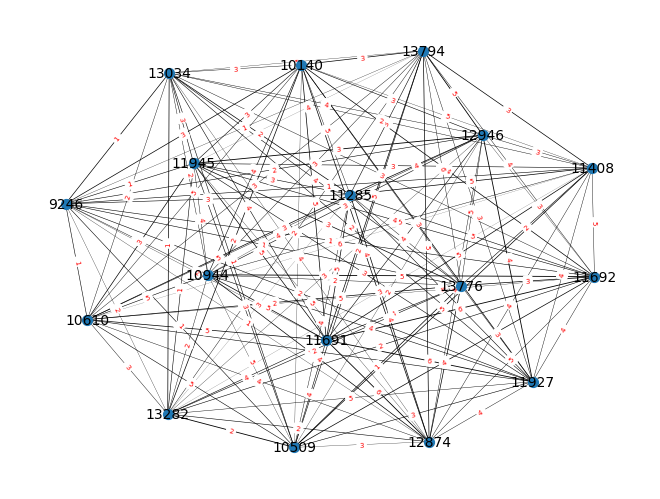

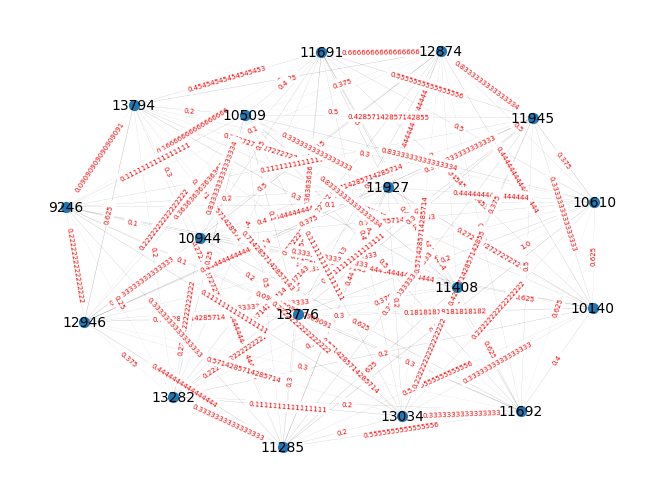

Recomendações para o usuário 9246: [9, 2, 15, 7, 2, 15, 13]
Similaridade com o usuário 11691: 0.16666666666666666
Similaridade com o usuário 13794: 0.09090909090909091
Similaridade com o usuário 10140: 0.3333333333333333
Similaridade com o usuário 11927: 0.2
Similaridade com o usuário 11692: 0.09090909090909091
Similaridade com o usuário 11285: 0.3333333333333333
Similaridade com o usuário 13776: 0.1
Similaridade com o usuário 12946: 0.2222222222222222
Similaridade com o usuário 12874: 0.1
Similaridade com o usuário 11408: 0.1
Similaridade com o usuário 10610: 0.1
Similaridade com o usuário 10944: 0.1
Similaridade com o usuário 13282: 0.25
Similaridade com o usuário 11945: 0.1111111111111111
Similaridade com o usuário 10509: 0.1111111111111111
Similaridade com o usuário 13034: 0.1111111111111111


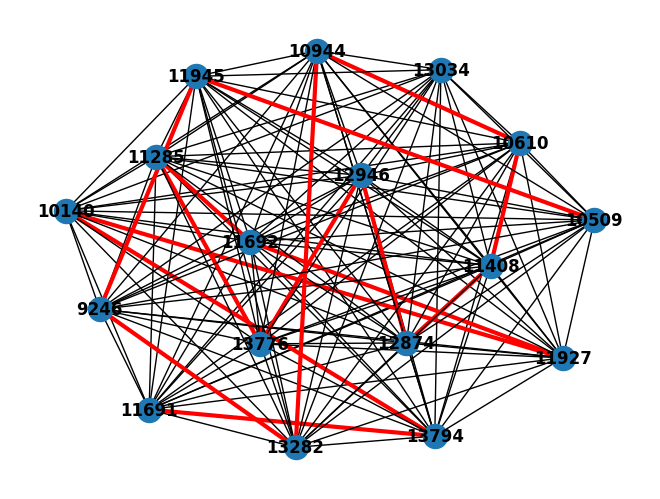

Caminho DFS a partir de 13034:
13794
10140
11927
11692
11285
13776
12946
12874
11408
10610
10944
13282
9246
11945
10509
13034


In [85]:
##Mesmo codigo do acima mas agora com o Algoritomo de Jaccand para fazer a recomendaçao
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# ... Seu código anterior ...
import pandas as pd
import numpy as np

books = pd.read_csv('DdosReduzidos300.csv', low_memory=False, delimiter=';') #o low memory é pq o arquivo é muito grande e ai o panda n precisa identificar cada variavel, se ele nao identificar ele colcoa como string, Deixa mais rapido
books.head(3)

#Selecionando as variaveis que vao ser utlizadas
books = books[['book_id', 'user_id', 'rating' ]]

print("Antes de removido \n", books.isna().sum()) 

#removendo se tivesse valores nulos
books.dropna(inplace=True)

print("Depois de removido \n", books.isna().sum()) 

#verificando a quantidade de avaliações por usuários
books['user_id'].value_counts()

#pegando os usuarios que fizeram mais de 3 avaliações
qt_rating = books['user_id'].value_counts() >= 5
y = qt_rating[qt_rating].index
y.shape

print("Usuarios selecionados: ", y)

#visualizando o tamanho do dataset
print("Dataset antes: ", books.shape)

#Pegando somente dos usuraios que avaliaram mais de 3 vezes mas agora no dataframe
books = books[books['user_id'].isin(y)]

print("Dataset depois: ", books.shape)

##############################################################################

import networkx as nx
import matplotlib.pyplot as plt

# Função para criar o grafo com base nos usuários e livros em comum
def create_user_graph(users, books):
    G = nx.Graph()
    G.add_nodes_from(users)
    
    edge_weights = {}  # Dicionário para armazenar os pesos das arestas
    
    for user1 in users:
        for user2 in users:
            if user1 != user2:
                books_user1 = set(books[books['user_id'] == user1]['book_id'])
                books_user2 = set(books[books['user_id'] == user2]['book_id'])
                common_books = books_user1.intersection(books_user2)
                if common_books:
                    weight = len(common_books)
                    edge_weights[(user1, user2)] = weight
                    G.add_edge(user1, user2)
    
    return G, edge_weights

# Crie o grafo
G, edge_weights = create_user_graph(y, books)

# Exemplo de layout para visualização
pos = nx.spring_layout(G)

# Obtenha os rótulos dos nós (ID dos usuários)
node_labels = {node: str(node) for node in G.nodes()}

# Obtenha os rótulos das arestas
edge_labels = {edge: weight for edge, weight in edge_weights.items()}

# Ajuste o tamanho das arestas com base nos pesos
edge_width = [0.1 * weight for weight in edge_weights.values()]

# Desenhe os nós com rótulos
nx.draw(G, pos, node_size=50, width=edge_width, with_labels=False)
nx.draw_networkx_labels(G, pos, labels=node_labels, font_size=10, font_color='black')

# Desenhe os rótulos das arestas
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=5, font_color='red')

# Mostre o gráfico
plt.axis('off')
plt.show()

######################################################################################

# Função para calcular o coeficiente de Jaccard entre dois conjuntos
def jaccard_similarity(set1, set2):
    intersection = len(set1.intersection(set2))
    union = len(set1.union(set2))
    return intersection / union if union != 0 else 0

# Função para criar um grafo ponderado com base no coeficiente de Jaccard
def create_user_graph_with_jaccard(users, books):
    G = nx.Graph()
    G.add_nodes_from(users)
    
    edge_weights = {}  # Dicionário para armazenar os pesos das arestas
    
    for user1 in users:
        for user2 in users:
            if user1 != user2:
                books_user1 = set(books[books['user_id'] == user1]['book_id'])
                books_user2 = set(books[books['user_id'] == user2]['book_id'])
                jaccard = jaccard_similarity(books_user1, books_user2)
                if jaccard > 0:  # Apenas considere pares com coeficiente de Jaccard maior que 0
                    edge_weights[(user1, user2)] = jaccard
                    G.add_edge(user1, user2)
    
    return G, edge_weights

# Crie o grafo com coeficiente de Jaccard
G, edge_weights = create_user_graph_with_jaccard(y, books)

# ... O restante do seu código para visualização do grafo ...
# Exemplo de layout para visualização
pos = nx.spring_layout(G)

# Obtenha os rótulos dos nós (ID dos usuários)
node_labels = {node: str(node) for node in G.nodes()}

# Obtenha os rótulos das arestas
edge_labels = {edge: weight for edge, weight in edge_weights.items()}

# Ajuste o tamanho das arestas com base nos pesos
edge_width = [0.1 * weight for weight in edge_weights.values()]

# Desenhe os nós com rótulos
nx.draw(G, pos, node_size=50, width=edge_width, with_labels=False)
nx.draw_networkx_labels(G, pos, labels=node_labels, font_size=10, font_color='black')

# Desenhe os rótulos das arestas
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=5, font_color='red')

# Mostre o gráfico
plt.axis('off')
plt.show()

# Exemplo: Recomendar livros com base em usuários semelhantes com similaridade maior ou igual a 0.3
def recommend_books(user_id, books, G, edge_weights, num_recommendations, min_similarity):
    similar_users = [node for node in G.neighbors(user_id)]
    book_ids = set(books[books['user_id'] == user_id]['book_id'])
    recommendations = []

    for user in similar_users:
        user_books = set(books[books['user_id'] == user]['book_id'])
        common_books = user_books.difference(book_ids)
        similarity = edge_weights.get((user_id, user), 0)  # Obtém a similaridade de Jaccard entre os usuários
        
        if similarity >= min_similarity:  # Considere apenas pares com similaridade maior ou igual a min_similarity
            for book in common_books:
                recommendations.append((book, similarity))
    
    recommendations.sort(key=lambda x: x[1], reverse=True)
    
    return [book for book, _ in recommendations[:num_recommendations]]

# Exemplo de recomendação para um usuário
user_id_to_recommend = 9246  # Substitua pelo ID do usuário desejado
recommended_books = recommend_books(user_id_to_recommend, books, G, edge_weights, num_recommendations=7, min_similarity=0.3)
print("Recomendações para o usuário {}: {}".format(user_id_to_recommend, recommended_books))

# Obtém todas as similaridades do nó de referência para outros nós
similarities_to_reference_node = {}
for node in G.nodes():
    if node != user_id_to_recommend:
        similarity = edge_weights.get((user_id_to_recommend, node), 0)
        similarities_to_reference_node[node] = similarity

# Exibe as similaridades
for node, similarity in similarities_to_reference_node.items():
    print(f"Similaridade com o usuário {node}: {similarity}")
    

import networkx as nx
import matplotlib.pyplot as plt

# ... (seu código para criar o grafo)
G, edge_weights = create_user_graph(y, books)

pos = nx.spring_layout(G)  # Posição dos vértices

# Crie uma lista para armazenar todos os caminhos DFS
all_paths = []
i=0
# Iterar sobre todos os nós do grafo e executar o DFS a partir de cada nó
for source_node in G.nodes():
    edge_colors = ["black"] * len(G.edges())
    line_width = [1] * len(G.edges())

    # Atualize o map apenas para as arestas presentes no grafo
    edge_list = list(G.edges())
    map = {edge: i for i, edge in enumerate(edge_list)}

    path = []  # Lista para armazenar o caminho DFS

    def dfs_callback(event):
        u, v = event
        path.append(v)  # Adicione o nó atual ao caminho

    # Use o algoritmo DFS com a função de retorno para rastrear o caminho
    dfs_edges = nx.dfs_edges(G, source=source_node)
    for x in dfs_edges:
        if x in map:
            edge_colors[map[x]] = "red"
            line_width[map[x]] = 3
            dfs_callback(x)
    
    if i == 0:  # Trate o primeiro nó de forma especial
        # Para o primeiro nó, adicione uma aresta para o segundo nó se existir
        first_node = source_node
        second_node = next(iter(G.nodes()))
        i=i+1
        if G.has_edge(first_node, second_node):
            edge_colors[map[(first_node, second_node)]] = "red"
            line_width[map[(first_node, second_node)]] = 3
            
    all_paths.append(path)  # Adicione o caminho ao conjunto de caminhos

# Desenhe o grafo
nx.draw(G, pos, with_labels=True, font_weight="bold", edge_color=edge_colors, width=line_width)
plt.show()

# Imprima todos os caminhos DFS a partir de todos os nós
# for i, source_node in enumerate(G.nodes()):
#     print(f"Caminho DFS a partir de {source_node}:")
print(f"Caminho DFS a partir de {source_node}:")
i=0
for node in all_paths[i]:
    print(node)





Antes de removido 
 book_id    0
user_id    0
rating     0
dtype: int64
Depois de removido 
 book_id    0
user_id    0
rating     0
dtype: int64
Usuarios selecionados:  Index([11691, 13794, 10140, 11927, 11692, 11285, 13776, 12946, 12874, 11408,
       10610, 10944, 13282,  9246, 11945, 10509, 13034],
      dtype='int64', name='user_id')
Dataset antes:  (300, 3)
Dataset depois:  (105, 3)


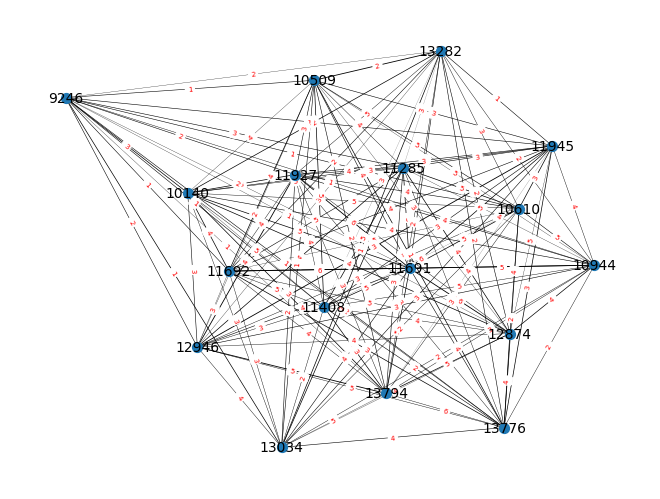

start_node: 11691
visited: {11691}
node: 11691
neighbor: 13794
node: 11691
neighbor: 11927
aqiiii
{11691, 11927}
node: 11691
neighbor: 13794
node: 11691
neighbor: 11692
aqiiii
{11691, 11692, 11927}
node: 11691
neighbor: 13794
node: 11691
neighbor: 12874
aqiiii
{12874, 11691, 11692, 11927}
node: 12874
neighbor: 13794
aqiiii
{13794, 12874, 11691, 11692, 11927}
node: 13794
neighbor: 10140
node: 13794
neighbor: 13776
aqiiii
{13794, 12874, 11691, 11692, 13776, 11927}
node: 13794
neighbor: 10140
node: 13794
neighbor: 12946
aqiiii
{13794, 12874, 11691, 11692, 13776, 12946, 11927}
node: 13794
neighbor: 10140
node: 13794
neighbor: 11945
node: 13794
neighbor: 13034
aqiiii
{13794, 12874, 11691, 11692, 13034, 13776, 12946, 11927}
node: 13794
neighbor: 10140
node: 13794
neighbor: 11945
node: 12874
neighbor: 11945
aqiiii
{13794, 11945, 12874, 11691, 11692, 13034, 13776, 12946, 11927}
node: 13794
neighbor: 10140
node: 11945
neighbor: 10944
node: 11691
neighbor: 10140
aqiiii
{13794, 11945, 12874, 1169

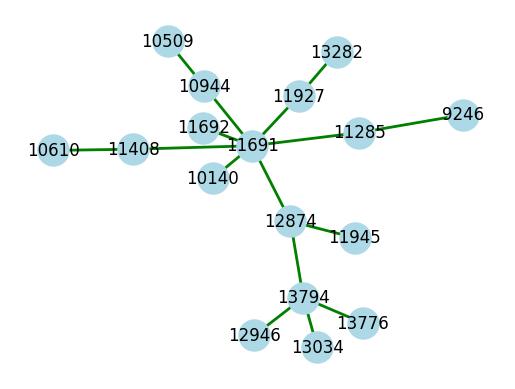

In [118]:
##Codigo acima mas organizado
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# ... Seu código anterior ...
import pandas as pd
import numpy as np

books = pd.read_csv('DdosReduzidos300.csv', low_memory=False, delimiter=';') #o low memory é pq o arquivo é muito grande e ai o panda n precisa identificar cada variavel, se ele nao identificar ele colcoa como string, Deixa mais rapido
books.head(3)

#Selecionando as variaveis que vao ser utlizadas
books = books[['book_id', 'user_id', 'rating' ]]

print("Antes de removido \n", books.isna().sum()) 

#removendo se tivesse valores nulos
books.dropna(inplace=True)

print("Depois de removido \n", books.isna().sum()) 

#verificando a quantidade de avaliações por usuários
books['user_id'].value_counts()

#pegando os usuarios que fizeram mais de 3 avaliações
qt_rating = books['user_id'].value_counts() >= 5
y = qt_rating[qt_rating].index
y.shape

print("Usuarios selecionados: ", y)

#visualizando o tamanho do dataset
print("Dataset antes: ", books.shape)

#Pegando somente dos usuraios que avaliaram mais de 3 vezes mas agora no dataframe
books = books[books['user_id'].isin(y)]

print("Dataset depois: ", books.shape)

##############################################################################

import networkx as nx
import matplotlib.pyplot as plt

# Função para criar o grafo com base nos usuários e livros em comum
# def create_user_graph(users, books):
#     G = nx.Graph()
#     G.add_nodes_from(users)
    
#     edge_weights = {}  # Dicionário para armazenar os pesos das arestas
    
#     for user1 in users:
#         for user2 in users:
#             if user1 != user2:
#                 books_user1 = set(books[books['user_id'] == user1]['book_id'])
#                 books_user2 = set(books[books['user_id'] == user2]['book_id'])
#                 common_books = books_user1.intersection(books_user2)
#                 if common_books:
#                     weight = len(common_books)
#                     edge_weights[(user1, user2)] = weight
#                     G.add_edge(user1, user2)
    
#     return G, edge_weights

def create_user_graph(users, books):
    G = nx.Graph()
    G.add_nodes_from(users)
    
    edge_weights = {}  # Inicialize o dicionário para armazenar os pesos das arestas
    
    for user1 in users:
        for user2 in users:
            if user1 != user2:
                books_user1 = set(books[books['user_id'] == user1]['book_id'])
                books_user2 = set(books[books['user_id'] == user2]['book_id'])
                common_books = books_user1.intersection(books_user2)
                if common_books:
                    weight = len(common_books)
                    G.add_edge(user1, user2, weight=weight)  # Adicione o atributo 'weight' à aresta
                    edge_weights[(user1, user2)] = weight  # Armazene o peso no dicionário
    
    return G, edge_weights


# Crie o grafo
G, edge_weights = create_user_graph(y, books)

# Exemplo de layout para visualização
pos = nx.spring_layout(G)

# Obtenha os rótulos dos nós (ID dos usuários)
node_labels = {node: str(node) for node in G.nodes()}

# Obtenha os rótulos das arestas
edge_labels = {edge: weight for edge, weight in edge_weights.items()}

# Ajuste o tamanho das arestas com base nos pesos
edge_width = [0.1 * weight for weight in edge_weights.values()]

# Desenhe os nós com rótulos
nx.draw(G, pos, node_size=50, width=edge_width, with_labels=False)
nx.draw_networkx_labels(G, pos, labels=node_labels, font_size=10, font_color='black')

# Desenhe os rótulos das arestas
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=5, font_color='red')

# Mostre o gráfico
plt.axis('off')
plt.show()

###############################################################################################
# #Arvore geradora máxima
# # Encontre a Árvore Geradora Máxima (Maximum Spanning Tree)
# T = nx.maximum_spanning_tree(G)

# # Visualize o grafo e a Árvore Geradora Máxima
# pos = nx.spring_layout(G)

# # Desenhe os nós do grafo original
# nx.draw_networkx_nodes(G, pos, node_color="lightblue", node_size=500)

# # Desenhe as arestas do grafo original com largura cinza
# nx.draw_networkx_edges(G, pos, edge_color="grey")

# # Desenhe os rótulos dos nós do grafo original
# nx.draw_networkx_labels(G, pos, font_size=12, font_family="sans-serif")

# # Crie um dicionário de labels para as arestas com base na quantidade de livros lidos em comum
# edge_labels = {(u, v): edge_weights[(u, v)] for u, v in T.edges()}

# # Desenhe os rótulos das arestas da Árvore Geradora Máxima
# nx.draw_networkx_edge_labels(T, pos, edge_labels=edge_labels, font_size=10)

# # Desenhe as arestas da Árvore Geradora Máxima com cor verde e largura 2
# nx.draw_networkx_edges(T, pos, edge_color="green", width=2)

# plt.axis("off")
# plt.show()

import networkx as nx

# Função para construir a Árvore Geradora Máxima a partir de um nó inicial
def build_maximum_spanning_tree(graph, start_node):
    T = nx.Graph()
    visited = set()
    visited.add(start_node)
    print(f"start_node: {start_node}")
    print(f"visited: {visited}")
    
    while len(visited) < len(graph.nodes()):
        max_weight = -float('inf')#Pega o - infinito para ser o menro valor possivel, ja que a arvore minima engloba os negativos
        max_edge = None
        
        for node in visited:
            for neighbor in graph.neighbors(node):
                if neighbor not in visited:
                    weight = graph[node][neighbor]['weight']  # Obtenha o peso da aresta diretamente
                    if weight > max_weight:
                        print(f"node: {node}")
                        print(f"neighbor: {neighbor}")
                        max_weight = weight
                        max_edge = (node, neighbor)
        
        if max_edge:
            print("aqiiii")
            u, v = max_edge
            T.add_edge(u, v, weight=max_weight)
            visited.add(v)
            print(visited)
    
    print(visited)
    return T


# def build_maximum_spanning_tree(graph, start_node):
#     T = nx.Graph()
#     visited = set()
#     visited.add(start_node)
    
#     current_node = start_node
    
#     while len(visited) < len(graph.nodes()):
#         max_weight = -float('inf')
#         max_edge = None
        
#         for neighbor in graph.neighbors(current_node):
#             if neighbor not in visited:
#                 weight = graph[current_node][neighbor]['weight']
#                 print(f"node: {node}")
#                 print(f"neighbor: {neighbor}")
#                 if weight >= max_weight:
#                     max_weight = weight
#                     max_edge = (current_node, neighbor)
        
#         if max_edge:
#             u, v = max_edge
#             T.add_edge(u, v, weight=max_weight)
#             visited.add(v)
#             current_node = v
    
#     return T




# Escolha um nó inicial
start_node = y[0]  # Por exemplo, você pode escolher o primeiro nó na sua lista de usuários selecionados (y)

# Construa a Árvore Geradora Máxima a partir do nó inicial
maximum_spanning_tree = build_maximum_spanning_tree(G, start_node)

# Visualize a Árvore Geradora Máxima
pos = nx.spring_layout(maximum_spanning_tree)

# Desenhe os nós
nx.draw_networkx_nodes(maximum_spanning_tree, pos, node_color="lightblue", node_size=500)

# Desenhe as arestas da Árvore Geradora Máxima
nx.draw_networkx_edges(maximum_spanning_tree, pos, edge_color="green", width=2)

# Desenhe os rótulos dos nós
node_labels = {node: node for node in maximum_spanning_tree.nodes()}
nx.draw_networkx_labels(maximum_spanning_tree, pos, labels=node_labels, font_size=12, font_family="sans-serif")

plt.axis("off")
plt.show()



    

In [97]:
#Calculo do Jaccand
######################################################################################
# Função para calcular o coeficiente de Jaccard entre dois conjuntos
def jaccard_similarity(set1, set2):
    intersection = len(set1.intersection(set2))
    union = len(set1.union(set2))
    return intersection / union if union != 0 else 0

# Exemplo: Recomendar livros com base em usuários semelhantes com similaridade maior ou igual a 0.3
def recommend_books(user_id, books, G, edge_weights, num_recommendations, min_similarity):
    similar_users = [node for node in G.neighbors(user_id)]
    book_ids = set(books[books['user_id'] == user_id]['book_id'])
    recommendations = []

    for user in similar_users:
        user_books = set(books[books['user_id'] == user]['book_id'])
        common_books = user_books.difference(book_ids)
        similarity = edge_weights.get((user_id, user), 0)  # Obtém a similaridade de Jaccard entre os usuários
        
        if similarity >= min_similarity:  # Considere apenas pares com similaridade maior ou igual a min_similarity
            for book in common_books:
                recommendations.append((book, similarity))
    
    recommendations.sort(key=lambda x: x[1], reverse=True)
    
    return [book for book, _ in recommendations[:num_recommendations]]

# Exemplo de recomendação para um usuário
user_id_to_recommend = 9246  # Substitua pelo ID do usuário desejado
recommended_books = recommend_books(user_id_to_recommend, books, G, edge_weights, num_recommendations=7, min_similarity=0.3)
print("Recomendações para o usuário {}: {}".format(user_id_to_recommend, recommended_books))

# Obtém todas as similaridades do nó de referência para outros nós
similarities_to_reference_node = {}
for node in G.nodes():
    if node != user_id_to_recommend:
        similarity = edge_weights.get((user_id_to_recommend, node), 0)
        similarities_to_reference_node[node] = similarity

# Exibe as similaridades
for node, similarity in similarities_to_reference_node.items():
    print(f"Similaridade com o usuário {node}: {similarity}")

In [ ]:
# Função para criar o grafo com base nos usuários e livros em comum
def create_user_graph(users, books):
    G = nx.Graph()
    G.add_nodes_from(users)
    
    edge_weights = {}  # Dicionário para armazenar os pesos das arestas
    
    for user1 in users:
        for user2 in users:
            if user1 != user2:
                books_user1 = set(books[books['user_id'] == user1]['book_id'])
                books_user2 = set(books[books['user_id'] == user2]['book_id'])
                common_books = books_user1.intersection(books_user2)
                if common_books:
                    weight = len(common_books)
                    edge_weights[(user1, user2)] = weight
                    G.add_edge(user1, user2)
    
    return G, edge_weights

# Crie o grafo
G, edge_weights = create_user_graph(y, books)

map = dict()

for i, item in enumerate(G.edges()):
    map[item] = i
edge_colors = ["black"] * len(G.edges())
line_width = [1] * len(G.edges())
for x in nx.dfs_edges(G, source=1):
    edge_colors[map[x]] = "red"
    line_width[map[x]] = 3

nx.draw_planar(
    G, with_labels=True, font_weight="bold", edge_color=edge_colors, width=line_width
)
plt.show()


Antes de removido 
 book_id    0
user_id    0
rating     0
dtype: int64
Depois de removido 
 book_id    0
user_id    0
rating     0
dtype: int64
Usuarios selecionados:  Index([11691, 13794, 10140, 11927, 11692, 11285], dtype='int64', name='user_id')
Dataset antes:  (300, 3)
Dataset depois:  (44, 3)


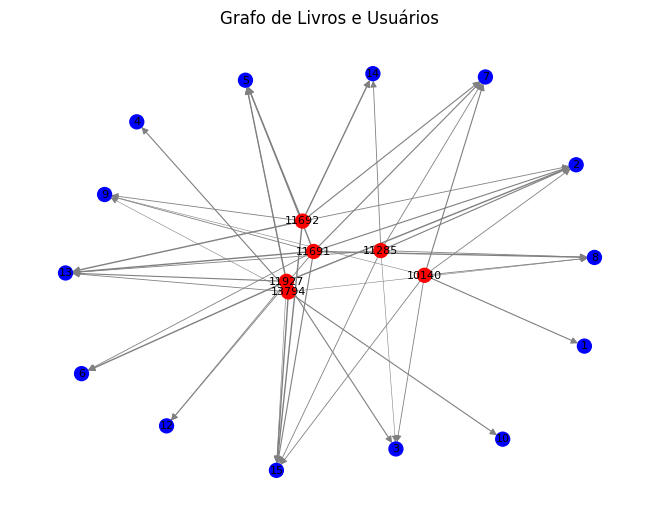

In [41]:
import pandas as pd
import numpy as np

books = pd.read_csv('DdosReduzidos300.csv', low_memory=False, delimiter=';') #o low memory é pq o arquivo é muito grande e ai o panda n precisa identificar cada variavel, se ele nao identificar ele colcoa como string, Deixa mais rapido
books.head(3)

#Selecionando as variaveis que vao ser utlizadas
books = books[['book_id', 'user_id', 'rating' ]]

print("Antes de removido \n", books.isna().sum()) 

#removendo se tivesse valores nulos
books.dropna(inplace=True)

print("Depois de removido \n", books.isna().sum()) 

#verificando a quantidade de avaliações por usuários
books['user_id'].value_counts()

#pegando os usuarios que fizeram mais de 3 avaliações
qt_rating = books['user_id'].value_counts() >= 7
y = qt_rating[qt_rating].index
y.shape

print("Usuarios selecionados: ", y)

#visualizando o tamanho do dataset
print("Dataset antes: ", books.shape)

#Pegando somente dos usuraios que avaliaram mais de 3 vezes mas agora no dataframe
books = books[books['user_id'].isin(y)]

print("Dataset depois: ", books.shape)


import pandas as pd
import networkx as nx

# Ler o DataFrame dos livros
books = pd.read_csv('DdosReduzidos300.csv', low_memory=False, delimiter=';')
books = books[['book_id', 'user_id', 'rating']]

# Remover linhas com valores nulos
books.dropna(inplace=True)

# Selecionar apenas os usuários que fizeram mais de 3 avaliações
qt_rating = books['user_id'].value_counts() >= 7
selected_users = qt_rating[qt_rating].index
books = books[books['user_id'].isin(selected_users)]

# Criar um grafo direcionado
G = nx.DiGraph()

# Adicionar nós para livros e usuários
for book_id in books['book_id'].unique():
    G.add_node(book_id, type='book')

for user_id in selected_users:
    G.add_node(user_id, type='user')

# Adicionar arestas ponderadas pelas notas dos livros
for _, row in books.iterrows():
    G.add_edge(row['user_id'], row['book_id'], weight=row['rating'])

# Agora, você tem um grafo com livros, usuários e arestas ponderadas pelas notas dos livros

# import matplotlib.pyplot as plt

# # Desenhe o grafo
# pos = nx.spring_layout(G)  # Layout para organizar os nós
# node_colors = [node['type'] for node in G.nodes(data=True)]
# edge_weights = [edge[2]['weight'] for edge in G.edges(data=True)]

# nx.draw(G, pos, with_labels=True, node_color=node_colors, edge_color=edge_weights, edge_cmap=plt.cm.Greys, node_size=50, font_size=8)

# # Adicione uma barra de cores para representar o peso das arestas (notas dos livros)
# sm = plt.cm.ScalarMappable(cmap=plt.cm.Greys, norm=plt.Normalize(vmin=min(edge_weights), vmax=max(edge_weights)))
# sm.set_array([])
# plt.colorbar(sm, label="Rating (Peso da Aresta)")

# plt.title("Grafo de Livros e Usuários")
# plt.show()

import matplotlib.pyplot as plt

# Layout do grafo
pos = nx.spring_layout(G)

# Defina cores para os nós
node_colors = ['blue' if data['type'] == 'book' else 'red' for _, data in G.nodes(data=True)]

# Calcule a espessura das arestas com base nas notas dos livros
edge_weights = [data['weight'] for _, _, data in G.edges(data=True)]
edge_weights = [w / max(edge_weights) * 1 for w in edge_weights]

# Desenhe o grafo
nx.draw(G, pos, with_labels=True, node_color=node_colors, node_size=100, font_size=8, edge_color='gray', width=edge_weights)

plt.title("Grafo de Livros e Usuários")
plt.show()




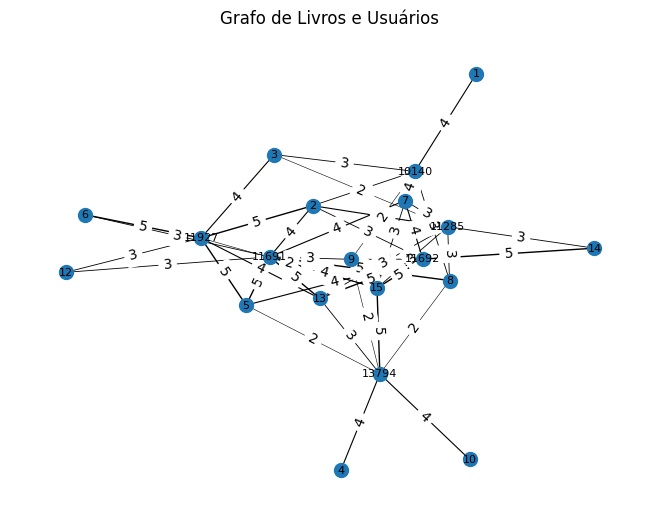

In [45]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Ler o DataFrame dos livros
books = pd.read_csv('DdosReduzidos300.csv', low_memory=False, delimiter=';')
books = books[['book_id', 'user_id', 'rating']]

# Remover linhas com valores nulos
books.dropna(inplace=True)

# Selecionar apenas os usuários que fizeram mais de 3 avaliações
qt_rating = books['user_id'].value_counts() >= 7
selected_users = qt_rating[qt_rating].index
books = books[books['user_id'].isin(selected_users)]

# Criar um grafo não direcionado
G = nx.Graph()

# Adicionar nós para livros e usuários
for book_id in books['book_id'].unique():
    G.add_node(book_id, type='book')

for user_id in selected_users:
    G.add_node(user_id, type='user')

# Adicionar arestas ponderadas pelas notas dos livros
for _, row in books.iterrows():
    G.add_edge(row['user_id'], row['book_id'], weight=row['rating'])

# Layout do grafo
pos = nx.spring_layout(G)

# Calcule a espessura das arestas com base nas notas dos livros
edge_weights = [data['weight'] for _, _, data in G.edges(data=True)]
edge_weights = [w / max(edge_weights) * 1 for w in edge_weights]

# Desenhe o grafo com as notas nas arestas
nx.draw(G, pos, with_labels=True, node_size=100, font_size=8, width=edge_weights)

# Adicione rótulos de arestas (notas) perto das arestas
labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)

plt.title("Grafo de Livros e Usuários")
plt.show()
